In [128]:
import pandas as pd
import unicodedata

In [117]:
#data = pd.read_csv('clutch/outsourcing.csv')
#data = data[data['description'].notnull()]
#data.head(5)

In [118]:
data.shape[0]

4243

In [104]:
data['description'][0]

'<div class="field-name-profile-summary" itemprop="description">\n                        <p>When you partner with Unosquare for your Staff Augmentation needs, you gain direct access to top-tier, Nearshore, development professionals.</p>\n\n<p>Your fully dedicated, augmented team is supported by a robust unit of SME\'s who are ALWAYS available to provide assistance to ensure the timely delivery of your applications.</p>\n\n<p>Your success is our success, and at Unosquare, we marry that with a set of best practices that includes showing up early, staying late, and consistently sharing insights on the team\'s velocity and output that continuously drives momentum forward.</p>\n                    </div>'

## Limpeza dos dados

In [173]:
##Função Para remover html tags
import pandas as pd
import re as re

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
#data['description_out_tags']=data['description'].apply(lambda cw : remove_tags(cw))
data['company_name']=data['company_name'].apply(lambda cw : remove_tags(cw))

In [175]:
##Função para tokenize e remoção de stopwords
def strip(text):
    #text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode('utf-8')
    text = re.sub('[^a-z0-9 ]+', '', str(text).lower())
    #text = re.sub(' +', ' ', text)
    #text = nltk.tokenize.word_tokenize(text, language='english')
    return text

In [140]:
data['description_out_tags'] = data['description_out_tags'].astype(str)
data['description_out_tags2'] = data['description_out_tags'].apply(lambda x : strip(x))
data.head(3)

In [181]:
data['company_name'] = data['company_name'].astype(str)
data['company_name'] = data['company_name'].apply(lambda x : strip(x))
data.head(3)

In [180]:
#data.head(3)

In [34]:
####OLD#######
#data = data.replace(r'\n',' ', regex=True)
#data = data.replace(r'<div class="field-name-profile-summary" itemprop="description">',' ', regex=True)
#data = data.replace(r'<p>',' ', regex=True)
#data = data.replace(r'</strong>',' ', regex=True)
#data = data.replace(r'</div>',' ', regex=True)
#data = data.replace(r'</li>',' ', regex=True)
#data = data.replace(r'<li>',' ', regex=True)
#data = data.replace(r'</ul>',' ', regex=True)
#data = data.replace(r'< strong >',' ', regex=True)
#data = data.replace(r'<strong>',' ', regex=True)
#data = data.replace(r'</p>',' ', regex=True)
#data = data.replace(r'</em>',' ', regex=True)
#data = data.replace(r'<br>',' ', regex=True)
#data = data.replace(r'<ul>',' ', regex=True)
#data = data.replace(r'</a>',' ', regex=True)
#data = data.replace(r'<em>',' ', regex=True)

In [179]:
pd.set_option('display.max_colwidth', -1)
#data[["description_out_tags2"]].drop_duplicates().head(20)

## Lematizacao

In [47]:
#!pip install nltk

In [143]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [144]:
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')

In [145]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [146]:
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [147]:
# Lemmatizing
data['Lemmatize'] = data['description_out_tags2'].apply(lambda x: lemmatize_sentence(x))

In [148]:
data['Lemmatize2'] = data['Lemmatize'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop)]))

In [178]:
#data.head(5)

## WordClouds

In [46]:
#!pip install wordcloud

In [151]:
import numpy
import pandas
import warnings

from matplotlib import pyplot
from wordcloud import WordCloud
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [152]:
##Configurações
warnings.filterwarnings(action='ignore')
pyplot.rcParams['figure.figsize'] = (13, 7)

In [153]:
0.05*4243

212.15

In [154]:
##Função Pooler

def pooler(documents, iters, min_df=5, max_df=0.7, ngram=(1, 3), max_features=1000):
    # documents vectorizer
    vectorizer = TfidfVectorizer(
        min_df=min_df,
        max_df=max_df,
        ngram_range=ngram,
        max_features=max_features
    ).fit(documents)
    
    vectorized = vectorizer.transform(documents)
    
    # pooler model
    sse = []
    models = []
    for k in iters:
        model = MiniBatchKMeans(n_clusters=k, init_size=200, batch_size=215, random_state=42).fit(vectorized)
        models.append(model)
        sse.append(model.inertia_)
        model.predict(vectorized)
        
    return models, sse, vectorized, vectorizer.get_feature_names()

def get_model(models, k):
    c = ((k - 2) // 2)
    return models[c]

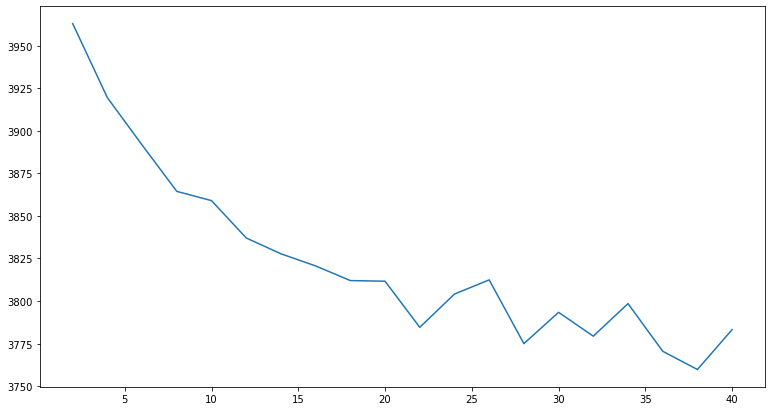

In [158]:
###Agrupamentos
descriptions = data.Lemmatize2.values

iters = range(2, 40 + 1, 2)
models, sse, vectorized, vocabulary = pooler(descriptions, iters, min_df=5, max_df=0.6, max_features=1500)

pyplot.plot(iters, sse)
pyplot.show()

In [182]:
###Agrupamento
k = 12
model = get_model(models, k)
model.predict(vectorized)

data['cluster'] = model.predict(vectorized)
data.head()

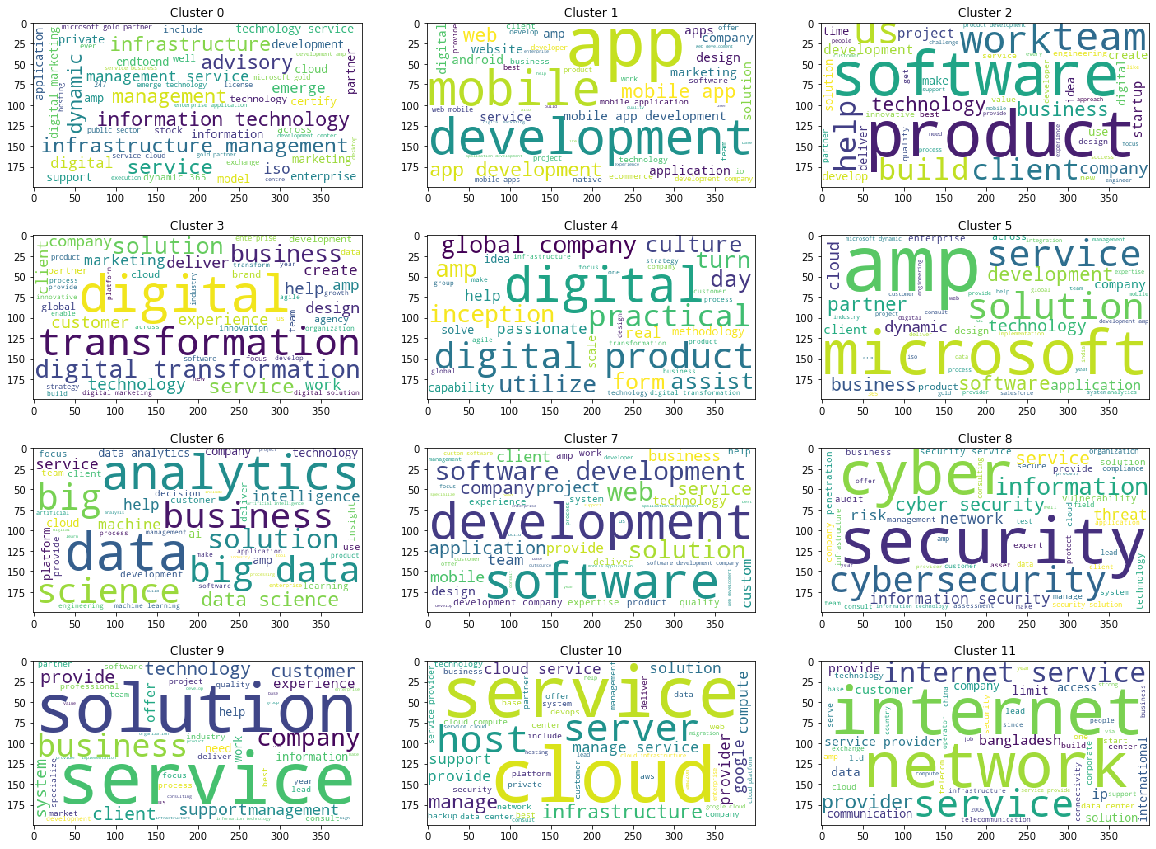

In [160]:
##Nuvem de palavras
mw = 50

fig = pyplot.figure(figsize = (20, 15))
vocabulary.append('')

i = 0
for r in model.cluster_centers_:
    dictionary = { vocabulary[k]: r[k] for k in numpy.argsort(r)[::-1][:mw] }
    dictionary = {k: v for k, v in dictionary.items() if v > 0}

    wc = WordCloud(background_color='white', max_words=mw, relative_scaling=0.1, normalize_plurals=True)
    image = wc.generate_from_frequencies(dictionary)

    ax = fig.add_subplot(4, 3, (i + 1))
    pyplot.imshow(image)
    ax.set_title(f'Cluster {i}')
    i = i + 1

In [161]:
##Top Exemplos dentro de cada cluster:
def sort_best_binds(key):
    # calculate similarities
    similarities = []
    centroid = model.cluster_centers_[key]
    for v in vectorized:
        similarities.append(cosine_similarity([centroid], v))

    # best binds
    indexes = numpy.array([s[0][0] for s in similarities])
    indexes = numpy.argsort(indexes)[::-1]
    
    return indexes

In [163]:
topn = 3

for i in range(len(model.cluster_centers_)):
    indexes = sort_best_binds(i)
    values = data.iloc[indexes[:topn]].description_out_tags2.values
    print(f'\nCluster: {i}')
    for v in range(topn):
        print(values[v][:100])


Cluster: 0
                        dev information technology ltd dev it is a company listed on national stock 
                        planet ecom solutions pecs is an iso 9001 amp microsoft certified outsourcin
                        konica minolta business solutions italia spa  la filiale italiana di konica 

Cluster: 1
                        wildnet  the worlds cost effective mobile and web app development agency for
                        historyinnomobileapps is a leading mobile application development company in
                        prismetric is an iso 90012015 certified mobile app development company havin

Cluster: 2
                        binariks is a software development and consulting company providing highqual
                        busymachines is an innovative software development company building complete
                        not sure what will happen with your startup in 23 months conduct a product d

Cluster: 3
                        digital transformat

In [169]:
##Classificacao dos clusteres
maps = {
    0: 'TI',
    1: 'Dev Mobile',
    2: 'Product Software',
    3: 'Transformacao Digital',
    4: 'Product Digital',
    5: 'Microsoft Solution',
    6: 'Business Analytics',
    7: 'Desenv Software',
    8: 'Cyber Security',
    9: 'Solution Service',
    10: 'Cloud Service',
    11: 'Network-Internet'
}

In [170]:
data['category'] = 'Outro'
top_binds = 70

for key in maps:
    if maps[key]:
        
        # best binds
        indexes = sort_best_binds(key)

        # labeling records
        data['category'].iloc[indexes[:top_binds]] = maps[key]
        data.groupby(['category'])['Lemmatize2'].count()

In [187]:
data.head(3)

,company_name,min_project_size,employees,hourly_rate,founded,rating,portfolio,description,description_out_tags,description_out_tags2,Lemmatize,Lemmatize2,cluster,category
0,unosquare llc,"$25,000+",250 - 999,$25 - $49 / hr,Founded 2009,4.9,NaN,"<div class=""field-name-profile-summary"" itemprop=""description"">\n <p>When you partner with Unosquare for your Staff Augmentation needs, you gain direct access to top-tier, Nearshore, development professionals.</p>\n\n<p>Your fully dedicated, augmented team is supported by a robust unit of SME's who are ALWAYS available to provide assistance to ensure the timely delivery of your applications.</p>\n\n<p>Your success is our success, and at Unosquare, we marry that with a set of best practices that includes showing up early, staying late, and consistently sharing insights on the team's velocity and output that continuously drives momentum forward.</p>\n </div>","\n When you partner with Unosquare for your Staff Augmentation needs, you gain direct access to top-tier, Nearshore, development professionals.\n\nYour fully dedicated, augmented team is supported by a robust unit of SME's who are ALWAYS available to provide assistance to ensure the timely delivery of your applications.\n\nYour success is our success, and at Unosquare, we marry that with a set of best practices that includes showing up early, staying late, and consistently sharing insights on the team's velocity and output that continuously drives momentum forward.\n",when you partner with unosquare for your staff augmentation needs you gain direct access to toptier nearshore development professionalsyour fully dedicated augmented team is supported by a robust unit of smes who are always available to provide assistance to ensure the timely delivery of your applicationsyour success is our success and at unosquare we marry that with a set of best practices that includes showing up early staying late and consistently sharing insights on the teams velocity and output that continuously drives momentum forward,when you partner with unosquare for your staff augmentation need you gain direct access to toptier nearshore development professionalsyour fully dedicate augmented team be support by a robust unit of smes who be always available to provide assistance to ensure the timely delivery of your applicationsyour success be our success and at unosquare we marry that with a set of best practice that include show up early staying late and consistently share insight on the team velocity and output that continuously drive momentum forward,partner unosquare staff augmentation need gain direct access toptier nearshore development professionalsyour fully dedicate augmented team support robust unit smes always available provide assistance ensure timely delivery applicationsyour success success unosquare marry set best practice include show early staying late consistently share insight team velocity output continuously drive momentum forward,9,Outro
1,door3,"$25,000+",50 - 249,$150 - $199 / hr,Founded 2002,4.9,"AIG, Everest, HP, Freedom Mortgage, Stillwell-Hansen, Hamilton, FreshDirect, Attune, Clinique, Morgan Stanley, Coty","<div class=""field-name-profile-summary"" itemprop=""description"">\n <p>We are a software consultancy. Our purpose is to benefit our clients — their people, products, and services. </p>\n<p>Our core strengths are <strong>software development</strong>, <strong>technology strategy</strong>, and <strong>UI/UX design</strong>. Our difference is a peerless capacity to safely and reliably deliver solutions on-time and on-budget.</p>\n<p>Founded in 2002, we’re headquartered in New York City, and supported by a global team of talented professionals committed to building things of lasting value.</p>\n<p>Benefit from our hyper-competent software development, insight-driven strategy, and award-winning design practices. Morgan Stanley benefited. As did AIG, FreshDirect, HP, and hundreds of other organizations.</p>\n<p><strong>Examples

In [191]:
###Organizando o dataframe para analise final
data_final = data.drop('portfolio', axis=1).join(data['portfolio'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('portfolio'))

In [192]:
data_final.shape[0]

13461

In [195]:
data_final[data_final['category']!='Outro'].shape[0]

2759

In [196]:
data_final[data_final['category']!='Outro'].to_csv('outsourcing_TFID.csv')

In [198]:
data[['hourly_rate']].drop_duplicates()

,hourly_rate
0,$25 - $49 / hr
1,$150 - $199 / hr
3,$100 - $149 / hr
6,Undisclosed
9,$50 - $99 / hr
24,< $25 / hr
183,$200 - $300 / hr
258,$300+ / hr
